In [55]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

def least_square(y, x_mat):
    a = x_mat.T.dot(x_mat)
    b = x_mat.T.dot(y)
    # print(a)
    # print(b)
    return np.linalg.solve(a,b)
def build_poly(x, degree):
    poly = np.ones((len(x), 1))
    for deg in range(1, degree + 1):
        poly = np.c_[poly, np.power(x, deg)]
    return poly
def mse_loss(a, b):
    return np.mean((a - b) ** 2)


seed = 456
data_path = './data1.npz'
data = np.load(data_path)
x, y  = data['X'], data['y']
np.random.seed(seed)
np.random.shuffle(x)
np.random.seed(seed)
np.random.shuffle(y)

if len(x.shape) == 1:
    x = np.expand_dims(x, axis=1)
if len(y.shape) == 1:
    y = np.expand_dims(y, axis=1)

split_ratio = 0.9
num_sample = len(x)
num_var = x.shape
interval = int(num_sample * split_ratio)
x_train, y_train = x[:interval], y[:interval]
x_test, y_test = x[interval:], y[interval:]

In [61]:
np.sum(np.random.random((20,2)), axis=-1)

array([0.67821645, 0.87745226, 0.79588553, 1.22993416, 0.43688416,
       1.57652577, 0.35196658, 0.9854042 , 1.66252078, 1.83428261,
       1.72207387, 1.5490561 , 0.96695489, 0.65400167, 1.18439356,
       0.3458597 , 0.39769367, 0.99659051, 0.89824838, 1.36549419])

In [90]:
def normalize_axis(a):
    if len(a.shape) == 1:
        return np.expand_dims(a, axis=1)
    return a

def least_square(y, x_mat):
    a = x_mat.T.dot(x_mat)
    b = x_mat.T.dot(y)
    return np.linalg.solve(a,b)

def build_linear(x):
    poly = np.c_[np.ones(len(x)), x]
    return poly

def find_w(x, y):
    mean_y = np.mean(y)
    mean_x = np.mean(x)

    w1 = np.sum((y - mean_y) * (x - mean_x)) / np.sum((x - mean_x) ** 2)
    w0 = mean_y - w1 * mean_x
    return np.array([w0,w1])

def build_poly(x, degree):
    poly = np.ones((len(x), 1))
    for deg in range(1, degree + 1):
        poly = np.c_[poly, np.power(x, deg)]
    return poly


class KNN_linear_regressor(object):
    def __init__(self, n_neighbors:int=10):
        self.n_neighbors = n_neighbors
  
    def fit(self, x:np.ndarray, y:np.ndarray):
        self.x = normalize_axis(x)
        self.y = normalize_axis(y)

    def predict(self, x):
        x = normalize_axis(x)
        distance = np.sum((x[:,np.newaxis,:] - self.x[np.newaxis,:,:]) ** 2, axis=-1)
        min_indices = np.argsort(distance, axis=-1)
        neighbors_indices = min_indices[:,:self.n_neighbors]

        result = []
        for i, indices in enumerate(neighbors_indices):
            neighbors_x = np.squeeze(self.x[indices,...])
            neighbors_y = np.squeeze(self.y[indices,...])
            w = find_w(neighbors_x, neighbors_y)
            # w = least_square(neighbors_y, build_linear(neighbors_x))

            result.append(np.matmul(build_linear(x[i]), w))
        
        return np.array(result)

In [91]:
for n_neigh in range(2, 30):
    regressor = KNN_linear_regressor(n_neighbors=n_neigh)
    regressor.fit(x_train, y_train)
    y_test_predict = regressor.predict(x_test)
    print(n_neigh, mse_loss(y_test_predict, y_test))

2 318.2692142660404
3 9.16365227570985
4 5.899410349870134
5 5.0190888964551625
6 5.464684338235777
7 5.013701671610452
8 4.845192155383899
9 4.65583384445845
10 4.590738536389424
11 4.634783896339745
12 4.696684647984519
13 4.556524052974809
14 4.55012890086574
15 4.535624333684883
16 4.4777821712571315
17 4.36286078501358
18 4.4485221521340925
19 4.351112330310374
20 4.31767024692876
21 4.277274244281292
22 4.259492513038896
23 4.17278170943625
24 4.130035878964251
25 4.098155870157516
26 4.126612978093657
27 4.15118470565895
28 4.10293713483762
29 4.082318511265557


In [89]:
for n_neigh in range(2, 30):
    regressor = KNN_linear_regressor(n_neighbors=n_neigh)
    regressor.fit(x_train, y_train)
    y_test_predict = regressor.predict(x_test)
    print(n_neigh, mse_loss(y_test_predict, y_test))

2 318.2694006828483
3 9.163652273572259
4 5.899410350000664
5 5.019088896501384
6 5.464684338245063
7 5.013701671610875
8 4.845192155362832
9 4.655833844458723
10 4.590738536389727
11 4.634783896340477
12 4.696684647984837
13 4.556524052974575
14 4.5501289008652845
15 4.535624333684754
16 4.477782171256994
17 4.362860785013418
18 4.448522152133747
19 4.351112330310086
20 4.317670246928646
21 4.27727424428123
22 4.25949251303877
23 4.172781709436122
24 4.130035878964115
25 4.098155870157355
26 4.126612978093602
27 4.1511847056589035
28 4.102937134837608
29 4.08231851126554


In [ ]:
def least_square(y, x_mat):
    a = x_mat.T.dot(x_mat)
    b = x_mat.T.dot(y)
    # print(a)
    # print(b)
    return np.linalg.solve(a,b)
def build_poly(x, degree):
    poly = np.ones((len(x), 1))
    for deg in range(1, degree + 1):
        poly = np.c_[poly, np.power(x, deg)]
    return poly
def mse_loss(a, b):
    return np.mean((a - b) ** 2)

for degree in range(10):
# degree = 4
    #x_mat = np.c_[np.ones(len(x_train)), x_train.squeeze()]
    x_mat = build_poly(x_train.squeeze(), degree)
    w = least_square(y_train.squeeze(), x_mat)

    # x_test_mat = np.c_[np.ones(len(x_test)), x_test.squeeze()]
    predict_y = np.matmul(x_test_mat, w)
    print(degree, mse_loss(predict_y, y_test))

In [47]:
losses = []
for n_neigh in range(2, 30):
    regressor = KNeighborsRegressor(n_neighbors=n_neigh)
    regressor.fit(x_train[:,np.newaxis], y_train[:,np.newaxis])
    loss = mse_loss(regressor.predict(x_test[:,np.newaxis]), y_test[:,np.newaxis])
    print(n_neigh, "{:.3f}".format(loss))
    losses.append(loss)

2 5.668
3 5.591
4 5.077
5 4.844
6 4.719
7 4.477
8 4.552
9 4.559
10 4.599
11 4.648
12 4.669
13 4.509
14 4.462
15 4.482
16 4.368
17 4.294
18 4.398
19 4.292
20 4.232
21 4.234
22 4.211
23 4.182
24 4.123
25 4.115
26 4.164
27 4.154
28 4.082
29 4.045


27


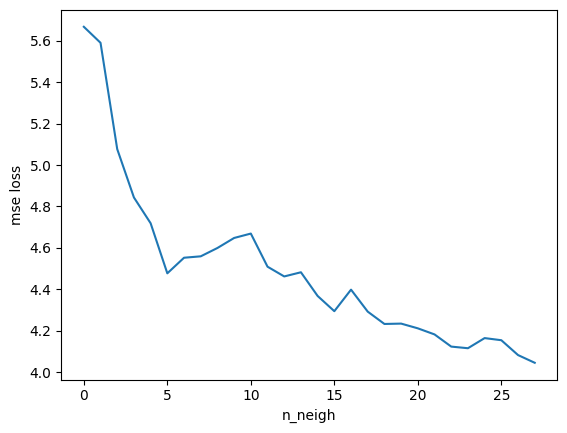

In [48]:
import matplotlib.pyplot as plt


plt.xlabel("n_neigh")
plt.ylabel("mse loss")
plt.plot(range(len(losses)), losses)
print(np.argmin(losses))

In [ ]:
x.shape

In [ ]:
data['X']

In [ ]:
data['y']